<a href="https://colab.research.google.com/github/paurosellfarre/MIA/blob/main/MIA_TFM2_PAU_ROSELL_FARRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0723 Máster en Aplicaciones de la Inteligencia Artificial en la Sanidad

**Trabajo Fin de Módulo 2**

**Autor:** Pau Rosell Farré


# Tarea 1
## Realiza una exploración del conjunto de datos utilizando métodos de la librería Pandas para cargar, filtrar y listar tablas de datos.

In [3]:
# Importamos las librerias
import pandas as pd

# Nombre del archivo CSV
file_name = "/content/heart_disease.csv"

# Lectura del archivo CSV en un DataFrame de Pandas
df = pd.read_csv(file_name)

# Muestra de las primeras filas del DataFrame para verificar la importación
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# Comprobamos la presencia de valores perdidos por variable
missing_values = df.isnull().sum()
print("Número de valores perdidos por variable:\n", missing_values)

Número de valores perdidos por variable:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [5]:
# Revisamos cuantas filas tenemos en nuestro Dataset
df.shape

(4238, 16)

# Tarea 2
## Prepara una o más funciones que permitan realizar una exploración visual de los datos más relevantes utilizando las librerías python de tu elección.

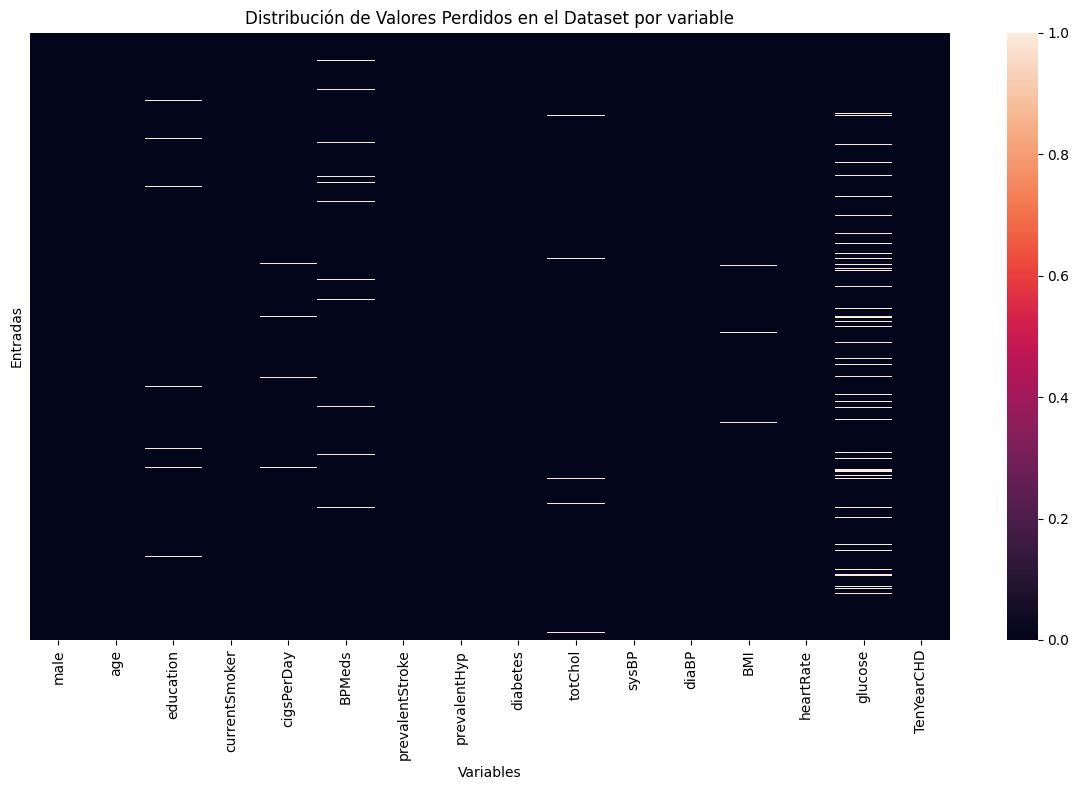

In [6]:
# Importamos las librerias
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizamos los valores perdidos por variable
plt.figure(figsize=(12, 8))  # Ajustamos el tamaño para mejorar la legibilidad
sns.heatmap(df.isnull(), yticklabels=False)
plt.title("Distribución de Valores Perdidos en el Dataset por variable")
plt.xlabel("Variables")
plt.ylabel("Entradas")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para evitar la superposición
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama
plt.show()

**Conclusión:**

Podemos observar que algunas variables como la 'glucose' tienen aproximadamente un 9-10% de variables perdidas.

Al ser un porcentaje elevado por la cantidad de filas de nuestro Dataset, no eliminaremos las filas con datos perdidos, sino que los imputaremos con la media más adelante. (Tarea 3)

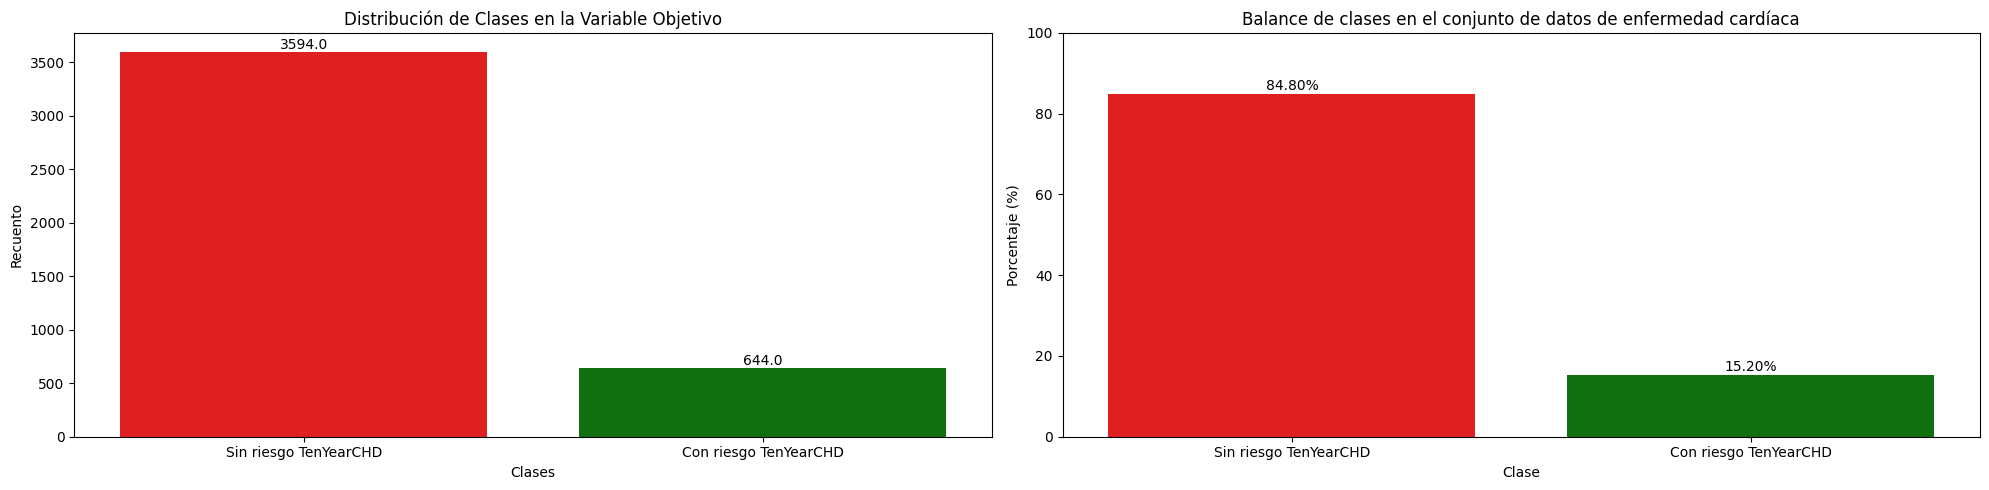

In [7]:
# Importar librerias
import numpy as np

# Crear una figura y ejes para los gráficos
fig, axs = plt.subplots(1, 2, figsize=(20, 5))  # 1 fila, 2 columnas

class_labels = ['Sin riesgo TenYearCHD', 'Con riesgo TenYearCHD']

# Gráfico 1: Distribución de la variable objetivo
sns.barplot(x=class_labels, y=np.bincount(df.TenYearCHD), ax=axs[0], palette=['red', 'green'])
axs[0].set_title('Histograma de Edad')
axs[0].set_title("Distribución de Clases en la Variable Objetivo")
axs[0].set_xlabel("Clases")
axs[0].set_ylabel("Recuento")

# Mostrar las etiquetas de datos en las barras
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_height()}', (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='bottom', color='black')

# Gráfico 2: Balance de clase objetivo en pocentajes
# Contar el porcentaje
class_percentages = np.bincount(df.TenYearCHD) / len(df.TenYearCHD) * 100

# Crear un gráfico de barras
sns.barplot(x=class_labels, y=class_percentages, ax=axs[1], palette=['red', 'green'])

# Añadir título y etiquetas a los ejes
axs[1].set_title('Balance de clases en el conjunto de datos de enfermedad cardíaca')
axs[1].set_xlabel('Clase')
axs[1].set_ylabel('Porcentaje (%)')
axs[1].set_ylim(0, 100)  # Establecer límites para el eje y para mejor claridad

# Mostrar los porcentajes en las barras
for i, percentage in enumerate(class_percentages):
    axs[1].text(i, percentage + 1, f'{percentage:.2f}%', ha='center')


# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()


**Conclusión:**

El conjunto de datos muestra un desbalance muy marcado, con mayor número de muestras clasificadas como 'Sin riesgo TenYearCHD' (0) en comparación con las muestras 'Con riesgo TenYearCHD' (1).

La diferencia es bastante extram con alrededor de un 85% de casos negativos y un 15% de casos positivos.

Esto puede causar que los modelos no den buenos resultados.

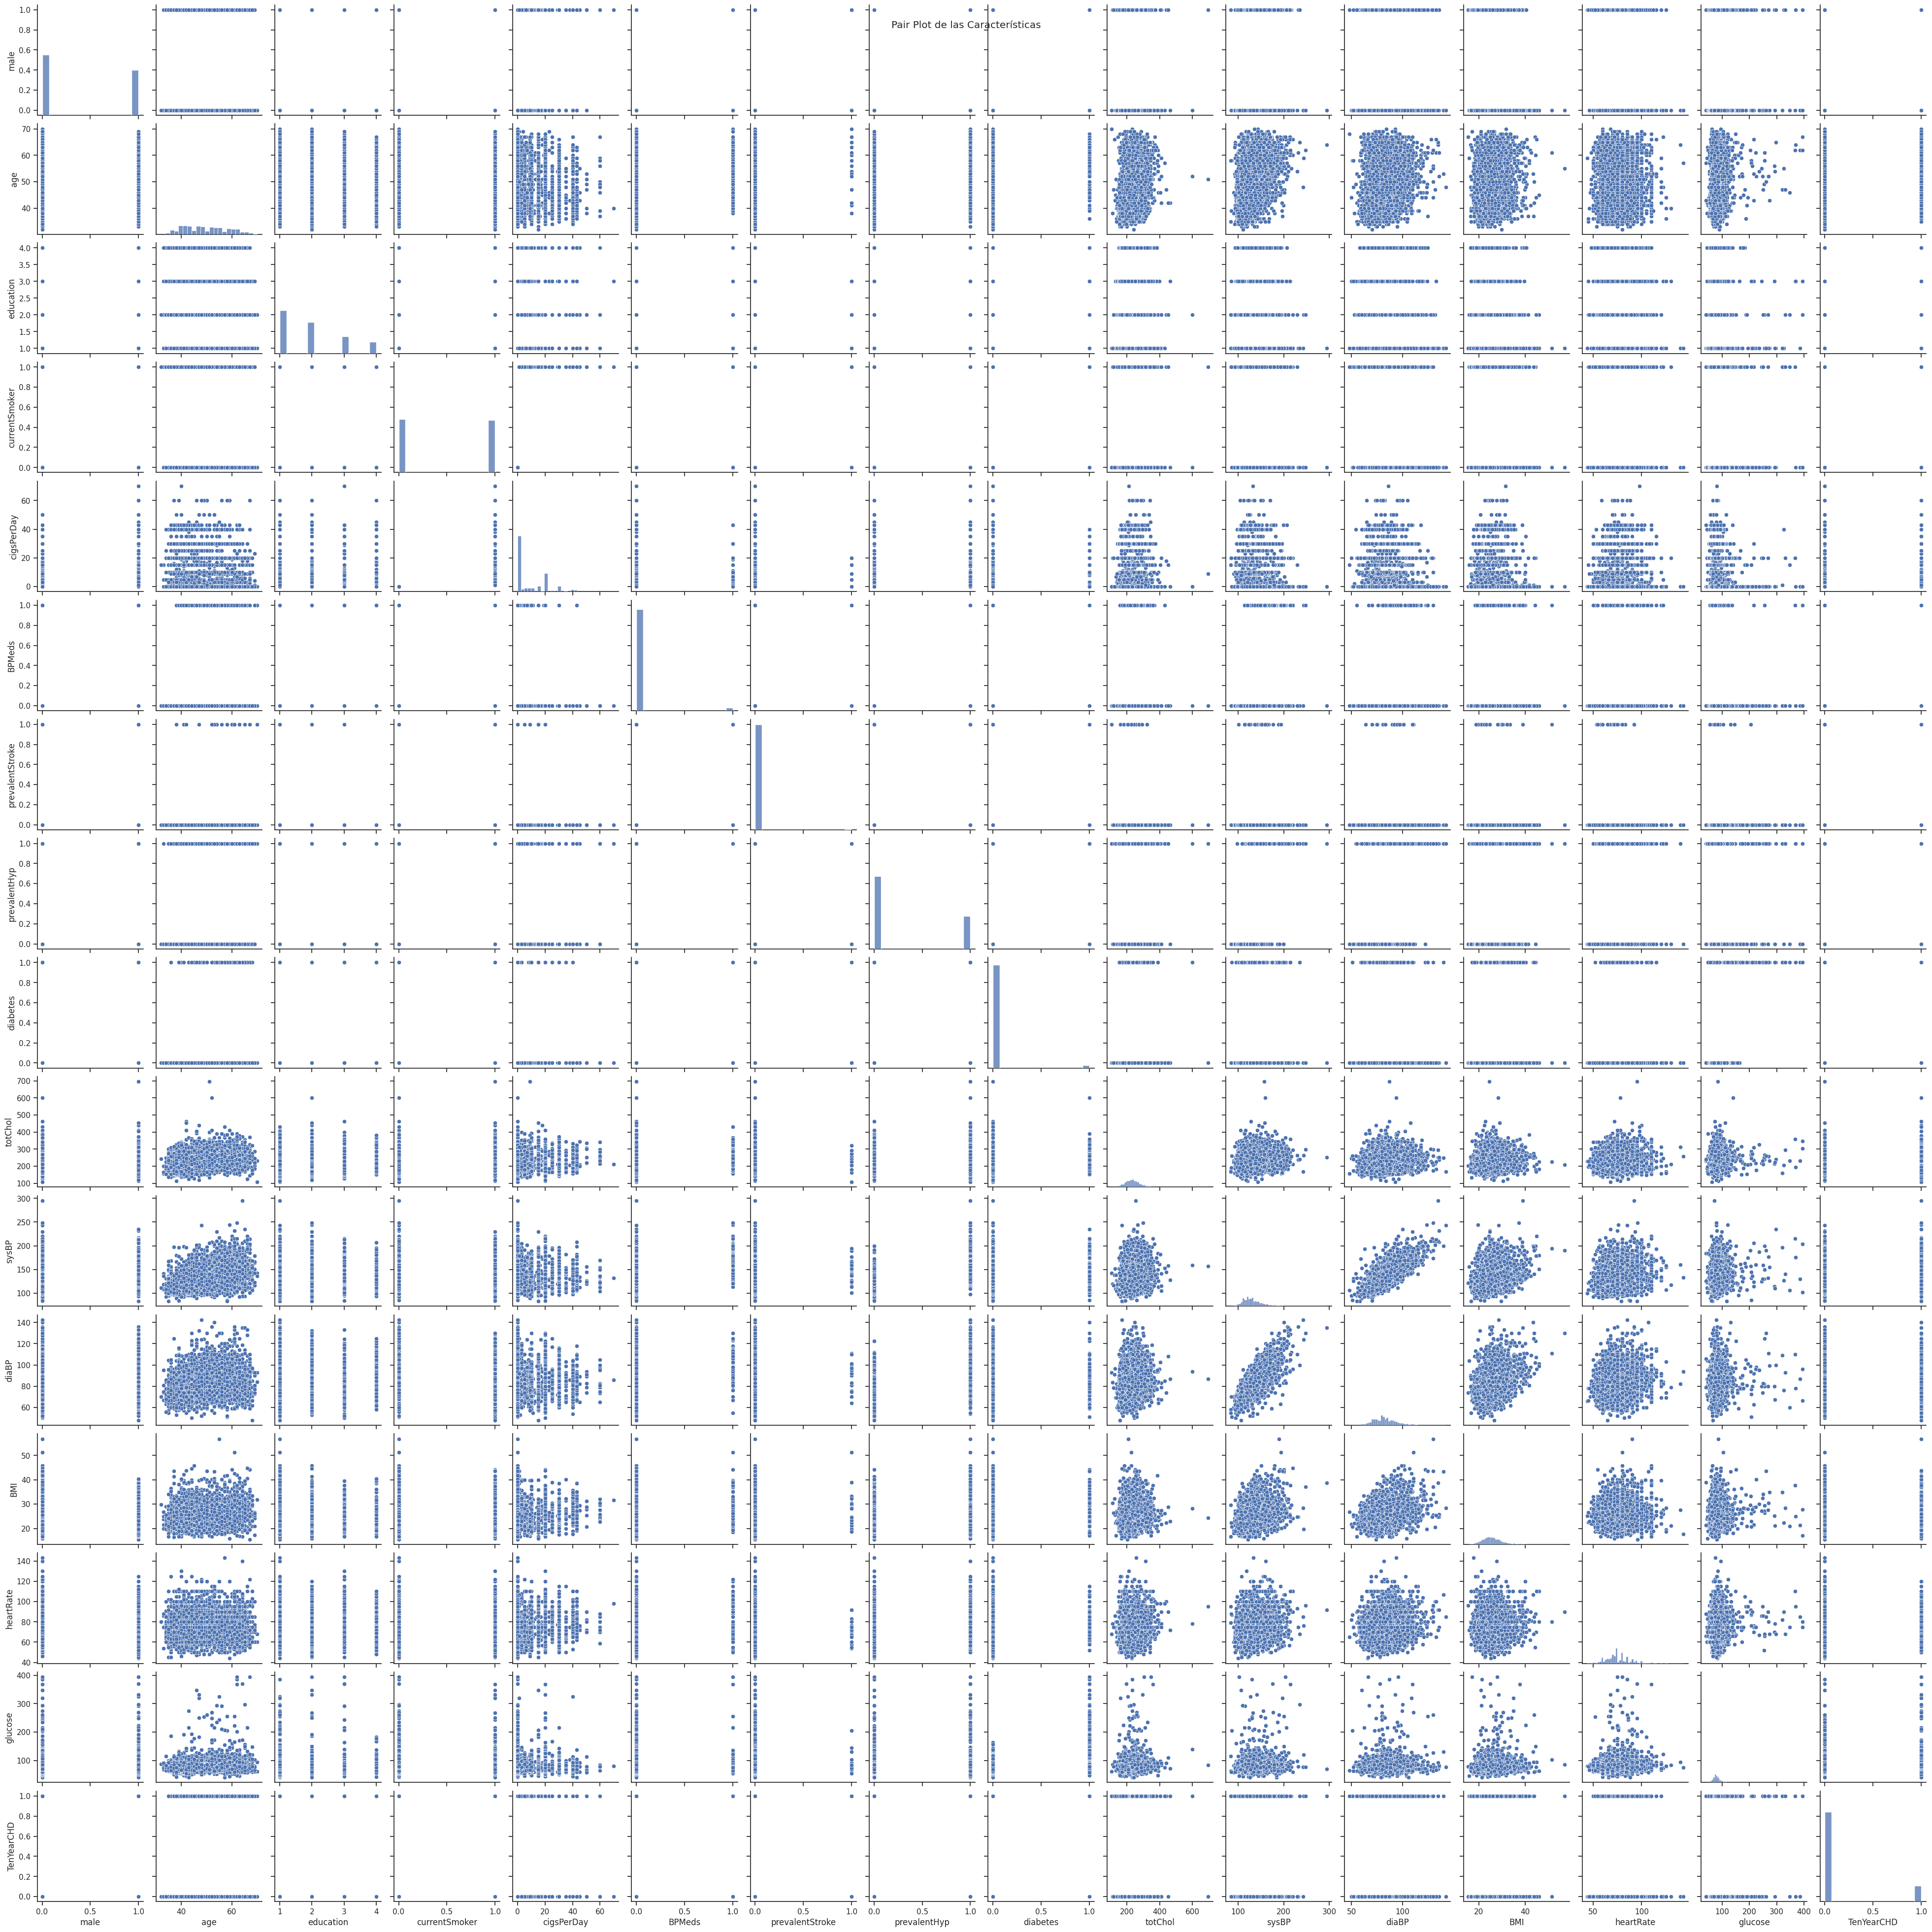

In [8]:
# Creamos un pair plot para visualizar las morfología de las correlaciones
sns.set(style="ticks")
pair_plot = sns.pairplot(df)
plt.suptitle("Pair Plot de las Características")
plt.show()

**Conclusión:**

Este pair plot nos puede ayudar a identificar patrones de correlación y tendencias.

Podemos observar tendencias positivas entre el diaBP y el sysBP, asi como el BMI

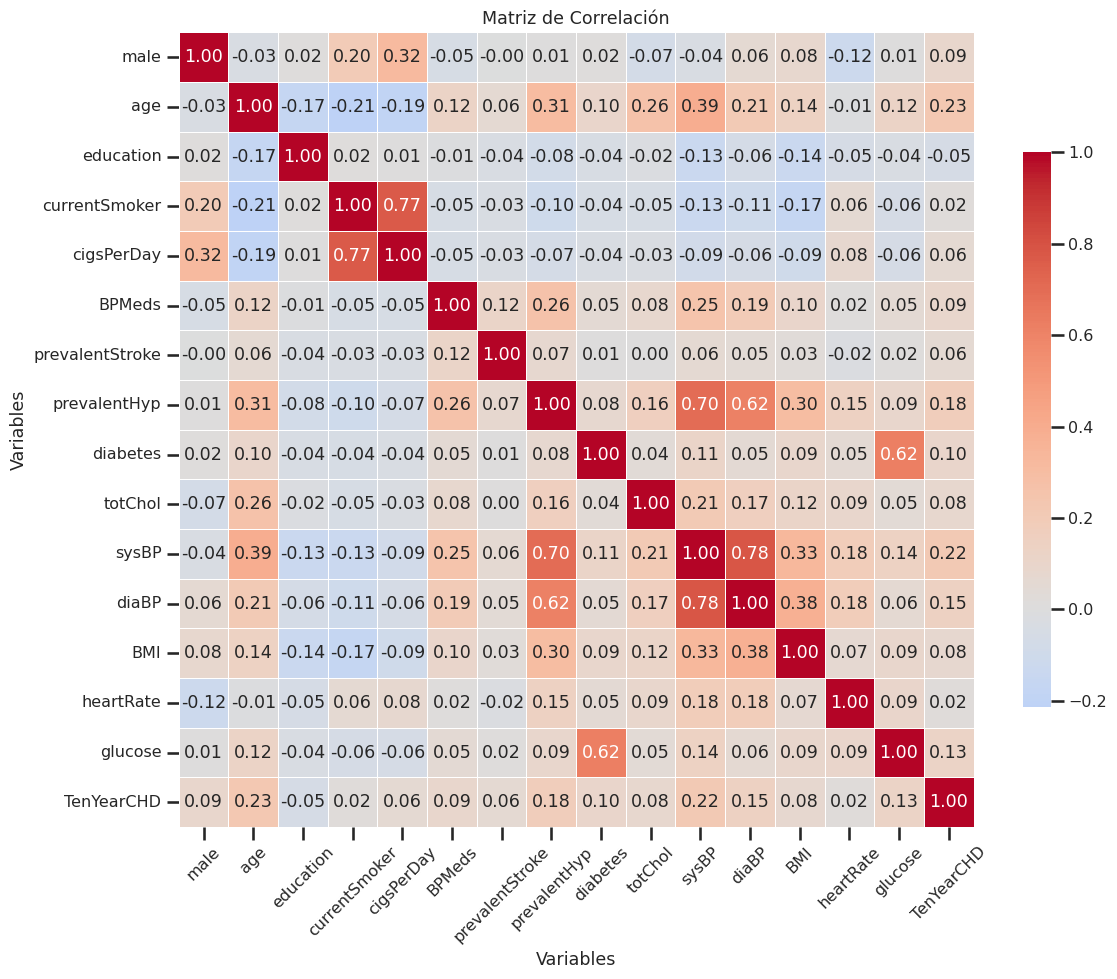

In [9]:
# Aumentamos el tamaño de la fuente
sns.set_context('talk', font_scale=0.7)

# Creamos una figura para visualizar la matriz de correlación con un tamaño ajustado
plt.figure(figsize=(12, 12))

# Generamos un mapa de calor de la matriz de correlación
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Configuramos títulos y etiquetas de los ejes
plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Rotar las etiquetas del eje x y mejorar la disposición de la figura
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama

**Conclusión:**

En el gráfico anterior podemos ver que algunas variables tienen correlación, asi como habiamos visto en el pair plot.

Realmente no es una correlación excesiva ya que no supera el 80%, pero por a muestra del trabajo, eliminaremos todas aquellas correlaciónes superiores al 75% (Tarea 4)

# Tarea 3
## Si lo estimas necesario, ejecuta métodos de imputación y normalización de datos explicando explicando brevemente tus decisiones.

In [10]:
# IMPUTACIÓN

# Tal como hemos comentado anteriormente imputamos datos para reducir el número de valores perdidos
# Para ello imputaremos la media en los valores nulo

#IMPORTANTE: En caso que variable objetivo sea binaria no deberia imputarse nunca, en este caso no se imputara ya que no existen valores vacios previos.

# Loop para recorrer todas las columnas del DF
for column in df.columns:
    # Verificar si la columna tiene valores perdidos
    if df[column].isnull().any():
        # Imputar con la media de la columna
        df[column].fillna(df[column].mean(), inplace=True)

# Comprobamos la NO presencia de valores perdidos por variable
missing_values = df.isnull().sum()
print("Número de valores perdidos por variable:\n", missing_values)


Número de valores perdidos por variable:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [24]:
# Normalización de Datos

# Utilizaremos Z-score normalization (StandardScaler de sklearn)
# Podriamos normalizar todos los datos, pero obviaremos los binarios ya que no tiene mucho sentido porque ya estan comprendidos entre 0 y 1
# Normalizar las variables para que tengan una media de 0 y una desviación estándar de 1.

from sklearn.preprocessing import StandardScaler

# Crear una copia del DataFrame para el escalado
df_scaled = df.copy()

# Seleccionar las columnas a normalizar (excluyendo la columna objetivo y binarios)
columns_to_normalize = df.columns.difference(['TenYearCHD', 'male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes'])

# Utilizar StandardScaler para escalar el conjunto de datos
scaler = StandardScaler()
df_scaled[columns_to_normalize] = scaler.fit_transform(df_scaled[columns_to_normalize])


# Mostrar el conjunto de datos escalado
print("\n Dataset escalado: \n", df_scaled)


 Dataset escalado: 
       male       age  education  currentSmoker  cigsPerDay   BPMeds  \
0        1 -1.234951   2.007088              0   -0.757974  0.00000   
1        0 -0.418257   0.020905              0   -0.757974  0.00000   
2        1 -0.184916  -0.972187              1    0.925835  0.00000   
3        0  1.331800   1.013996              1    1.767740  0.00000   
4        0 -0.418257   1.013996              1    1.178407  0.00000   
...    ...       ...        ...            ...         ...      ...   
4233     1  0.048425  -0.972187              1   -0.673784  0.00000   
4234     1  0.165095   1.013996              1    2.862216  0.00000   
4235     0 -0.184916   0.020905              1    0.925835  0.02963   
4236     0 -0.651598  -0.972187              1    0.504883  0.00000   
4237     0  0.281766   0.020905              0   -0.757974  0.00000   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                   0             0         0 

# Tarea 4
## Realiza un análisis básico de selección de características siguiendo alguna de las técnicas vistas a lo largo del módulo que te permita obtener una submuestra depurada del dataset original.

In [56]:
# Analisis de correlación

# En gráficos anteriores vimos que hay varias variables que presentan una correlación alta, vamos a descartar las que tengan +75% de correlación

# Implementamos una función que cree una lista con las columnas cuyo índice
# de correlación es inferior a cierto umbral (thres)
def find_lc_cols(df, thres):
  """
  Encuentra las variables con una correlación mayor que el umbral (thres)
  """
  corr = df.corr()
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
      if abs(corr.iloc[i,j]) >= thres:
        if columns[j]: columns[j] = False

  return columns

# Ejecutamos la función y recuperamos las columnas/variables con baja correlación
lc_cols = find_lc_cols(df_scaled, thres=0.75)
print("Variable/s con baja (<75%) correlación:", df_scaled.columns[lc_cols].tolist())


Variable/s con baja (<75%) correlación: ['male', 'age', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


**Conclusión:**

Con esta submuestra depurada podrememos entrenar nuestro modelo con mayor eficacia (reduciendo el coste de computación con una ligera perdida de precisión)

Se eliminaron las columnas cigsPerDay y diaBP


Más adelante en la tarea 6, utilizaremos 2 modelos (RandomForest y Regresión Logistica) para comparar eficacia.

In [50]:
# Generamos un Dataframe que sólo incluya las columnas que listamos anteriormente
s_cols = df_scaled.columns[lc_cols]
df_s = df_scaled[s_cols]
print("Variables seleccionadas:", len(df_s.columns))
print("De un total de:", len(df_scaled.columns))
print("Dataset final:", df_s)

Variables seleccionadas: 16
De un total de: 16
Dataset final:       male       age  education  currentSmoker  cigsPerDay   BPMeds  \
0        1 -1.234951   2.007088              0   -0.757974  0.00000   
1        0 -0.418257   0.020905              0   -0.757974  0.00000   
2        1 -0.184916  -0.972187              1    0.925835  0.00000   
3        0  1.331800   1.013996              1    1.767740  0.00000   
4        0 -0.418257   1.013996              1    1.178407  0.00000   
...    ...       ...        ...            ...         ...      ...   
4233     1  0.048425  -0.972187              1   -0.673784  0.00000   
4234     1  0.165095   1.013996              1    2.862216  0.00000   
4235     0 -0.184916   0.020905              1    0.925835  0.02963   
4236     0 -0.651598  -0.972187              1    0.504883  0.00000   
4237     0  0.281766   0.020905              0   -0.757974  0.00000   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0     

**Conclusión:**

Ya tenemos un dataset optimizado, normalizado y sin valores perdidos.

En la practica real, podriamos obviar eliminar las columnas con +75% de correlación en el caso que necesitemos aumentar la precisión del modelo. Pero tenemos que tener en cuenta que eso hara que tarde más en entrenarse ya que estamos añadiendo 2 columnas más.

# Tarea 5
## Partiendo de esta submuestra final, genera los grupos de entrenamiento y validación e imprime pos pantalla alguna características del mismo.

 - X_train: (3390, 15)
 - X_test: (848, 15)
 - y_train: (3390,)
 - y_test: (848,)


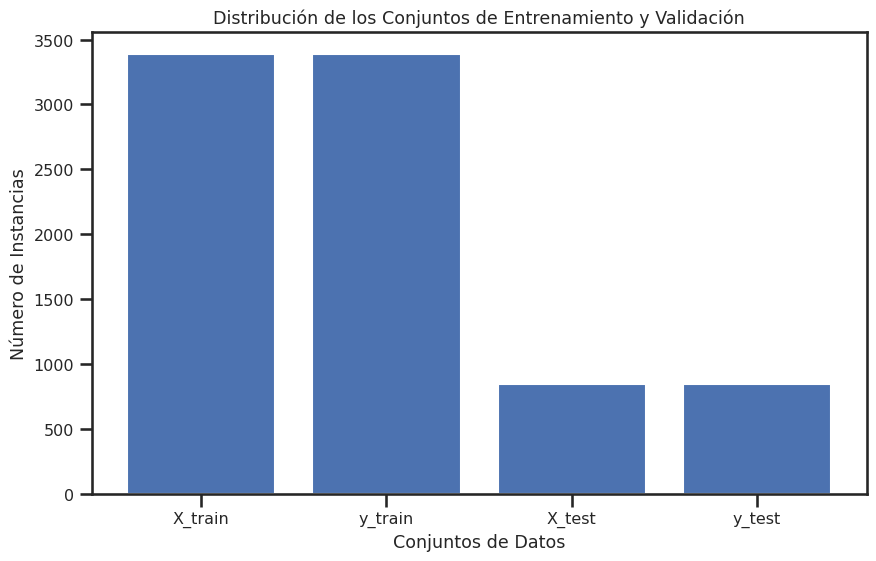

In [62]:
# Dividimos el dataset en entrenamiento y validación

# Función de Scikitlearn para los conjuntos de entrenamiento y validación
from sklearn.model_selection import train_test_split

# X = columnas para el entrenamiento
X = df_s.drop('TenYearCHD', axis=1)
# y = columna objetivo
y = df_s['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Veámos el tamaño de las arrays
print(" - X_train:", X_train.shape)
print(" - X_test:", X_test.shape)
print(" - y_train:", y_train.shape)
print(" - y_test:", y_test.shape)

# Gráfico de barras para mostrar el número de instancias
shapes = {
    'X_train': X_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': X_test.shape[0],
    'y_test': y_test.shape[0]
}
plt.figure(figsize=(10, 6))
plt.bar(shapes.keys(), shapes.values())
plt.xlabel('Conjuntos de Datos')
plt.ylabel('Número de Instancias')
plt.title('Distribución de los Conjuntos de Entrenamiento y Validación')
plt.show()

**Conclusión:**

Hemos dividido nuestro dataset en un 80% de datos para entrenar el modelo y un 20% de datospara posteriormente validar la precision del modelo.

# Tarea 6
## Instancia el modelo Scikit-learn de tu elección y aplícalo sobre los datos seleccionados para el entrenamiento.

In [63]:
# Importaremos varios modelos para ver cual es más eficaz con nuestro Dataset
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Inicializar los modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

# Entrenar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo
    print(name,"entrenado correctamente")

Logistic Regression entrenado correctamente
SVM entrenado correctamente
Decision Tree entrenado correctamente
Random Forest entrenado correctamente
KNN entrenado correctamente


# Tarea 7
## Calcula y muestra por pantalla información (métricas) sobre el desempeño del modelo frente al conjunto de validación.

In [67]:
# Importamos librerias de metricas
from sklearn.metrics import classification_report, roc_curve, auc

# Evaluar cada modelo
for name, model in models.items():
    y_pred = model.predict(X_test)  # Predecir en el conjunto de prueba
    print(name)
    print(classification_report(y_test, y_pred))  # Mostrar métricas de rendimiento


Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848

SVM
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       724
           1       1.00      0.02      0.05       124

    accuracy                           0.86       848
   macro avg       0.93      0.51      0.49       848
weighted avg       0.88      0.86      0.79       848

Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       724
           1       0.23      0.29      0.26       124

    accuracy                           0.76       848
   macro avg       0.55      0.56      0.56       848
weighted avg       0.78      0.76   

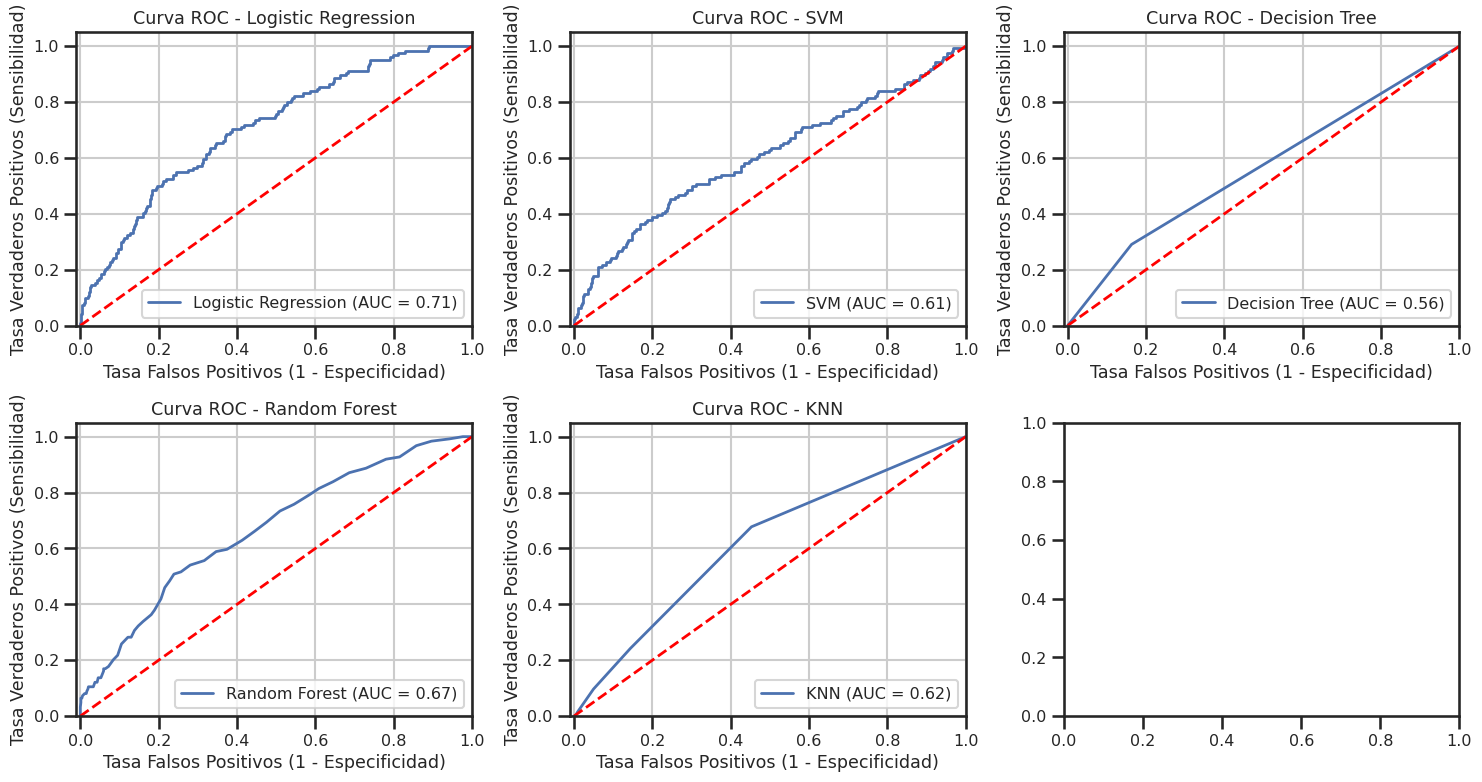

In [68]:
# Calcular el número de filas y columnas necesarias para organizar los subplots
num_models = len(models)
num_rows = 2
num_cols = 3

# Crear subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
fig.subplots_adjust(hspace=0.4)

# Iterar sobre los modelos y organizar en subplots
for i, (name, model) in enumerate(models.items()):
    # Calcular los valores de probabilidad asignados por el modelo sobre el conjunto de prueba
    y_score = model.predict_proba(X_test)[:, 1]

    # Calcular la tasa de falsos positivos y verdaderos positivos
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    # Calcular el área bajo la curva ROC (AUC)
    roc_auc = auc(fpr, tpr)

    # Organizar en subplots
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]

    # Visualizar la curva ROC en el subplot
    ax.plot(fpr, tpr, lw=2, label='{} (AUC = {:.2f})'.format(name, roc_auc))
    ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title('Curva ROC - {}'.format(name))
    ax.set_xlabel('Tasa Falsos Positivos (1 - Especificidad)')
    ax.set_ylabel('Tasa Verdaderos Positivos (Sensibilidad)')
    ax.legend(loc='lower right')
    ax.grid(True)

# Ajustar el diseño y mostrar los subplots
plt.tight_layout()
plt.show()


**Conclusión:**


---


**Logistic Regression:**

Modelo con más precisión

Precision-Recall Tradeoff:

La precisión para la clase 1 (enfermedad cardíaca) es baja. Esto podría deberse al desequilibrio de clases.


Baja Recall para la Clase 1:

La exhaustividad (recall) para la clase 1 es baja, lo que indica que el modelo tiene dificultades para identificar correctamente los casos positivos.


---


**SVM (Support Vector Machine):**

Precision Perfecta para la Clase 1:

La precisión para la clase 1 es perfecta (1.0), lo cual es notable. Sin embargo, la exhaustividad (recall) es baja, lo que sugiere que el modelo podría estar clasificando la mayoría de los casos como negativos.


---


**Decision Tree:**

Desempeño Relativamente Bajo:

La precisión y exhaustividad para ambas clases son más bajas en comparación con Logistic Regression y SVM. Esto podría indicar que el árbol de decisión está sobreajustando o no capturando bien la estructura del conjunto de datos.


---


**Random Forest:**

Desafío para Identificar Casos Positivos:

Similar a Decision Tree, Random Forest tiene dificultades para identificar correctamente los casos positivos, como se refleja en la baja recall para la clase 1.


---


**KNN (K-Nearest Neighbors):**

Desempeño Moderado:

La precisión y la exhaustividad para ambas clases son moderadas. KNN parece tener un rendimiento intermedio en comparación con otros modelos.


---


**Observaciones Generales:**

Desequilibrio de Clases:

Hay un desequilibrio en las clases, especialmente en la clase 1 (riesgo de enfermedad cardíaca), lo que afecta el rendimiento de los modelos.

# Tarea 8

## Una vez completado, comporte tu cuaderno de Google Colab con cualquier persona que tenga el enlace (apúntalo en la hoja de ejercicios).

[Enlace al cuaderno](https://colab.research.google.com/drive/1p5yEmlvhTgcXqcs8l5s_lMnESgXVHXz0?usp=sharing)